## Reconstruction Resolution

This Notebook reproduces supplement Figures S5, S6, and S7, which illustrate the energy and angular resolution of the cascade dataset.

## Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

## Angular Resolution (Figure S5)

The provided data file (`angular_resolution.csv`) contains a table with the 20%, 50%, and 80% quantiles of the opening angle distribution between true and reconstructed directions. These quantiles are provided for this work, for contained events of this work, and for the previous cascade analysis. The energy values at which these quantiles are evaluated are provided in the column `energy`.

#### Load Data

In [2]:
df_angerr = pd.read_csv('angular_resolution.csv')
df_angerr

,energy,this_work_20p,this_work_50p,this_work_80p,this_work_contained_20p,this_work_contained_50p,this_work_contained_80p,prev_work_20p,prev_work_50p,prev_work_80p
0,9.057989e+02,8.289,17.667,36.441,8.091,17.289,35.865,20.439,42.309,85.671
1,1.033663e+03,8.145,17.433,36.117,7.929,16.965,35.253,18.657,39.015,81.117
2,1.179576e+03,8.001,17.091,35.505,7.749,16.587,34.443,17.181,36.585,77.067
3,1.346087e+03,7.839,16.713,34.803,7.587,16.155,33.705,16.533,34.209,72.693
4,1.536102e+03,7.677,16.389,34.137,7.425,15.831,32.967,15.309,32.193,68.823
...,...,...,...,...,...,...,...,...,...,...
64,4.238811e+06,2.457,6.183,14.697,2.043,4.401,8.793,3.933,7.533,14.157
65,4.837168e+06,2.421,5.553,13.833,2.097,4.005,7.749,4.131,8.271,14.517
66,5.519989e+06,2.403,5.229,13.491,2.097,4.005,7.623,4.131,8.361,14.607
67,6.299198e+06,2.403,5.085,13.437,2.115,4.005,7.263,4.149,8.451,14.643


#### Make Plot

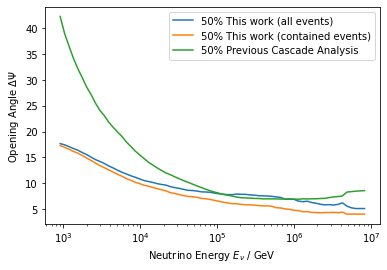

In [3]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_ylabel(r'Opening Angle $\Delta \Psi$')
ax.set_xlabel(r'Neutrino Energy $E_\nu$ / GeV')

ax.plot(df_angerr.energy, df_angerr.this_work_50p, label='50% This work (all events)')
ax.plot(df_angerr.energy, df_angerr.this_work_contained_50p, label='50% This work (contained events)')
ax.plot(df_angerr.energy, df_angerr.prev_work_50p, label='50% Previous Cascade Analysis')
ax.legend()


## Energy Resolution (Figure S6)

The data for the energy resolution plot (Figure S6) is distributed over multiple files:

- `EnergyResS6{a/b}_hist.csv`: contains the column-normalized histogram as a 2D array
- `EnergyResS6{a/b}_x_edges.csv`: contains the histogram bin edges along the x-axis
- `EnergyResS6{a/b}_y_edges.csv`: contains the histogram bin edges along the y-axis
- `EnergyResS6{a/b}_resolution.csv`: contains a data table with two columns corresponding to the energies and the resolution


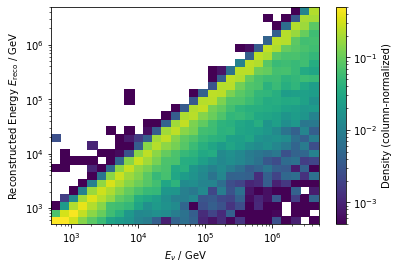

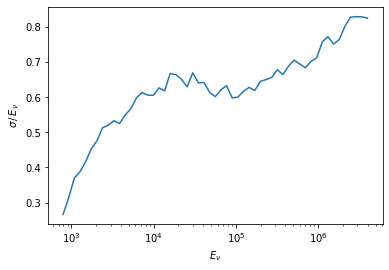

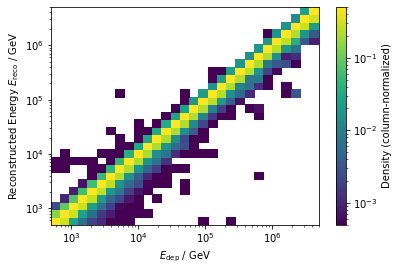

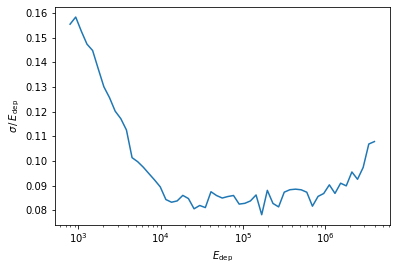

In [4]:
for name, xlabel in zip(
        ['EnergyResS6a', 'EnergyResS6b'], 
        [r'$E_\nu$', r'$E_\mathrm{dep}$'],
    ):
    
    # load the column-normalized histogram
    H = np.loadtxt('{}_hist.csv'.format(name), delimiter=',')
    
    # load the bin edges of the histogram
    xedges = np.loadtxt('{}_x_edges.csv'.format(name), delimiter=',')
    yedges = np.loadtxt('{}_y_edges.csv'.format(name), delimiter=',')
    
    # load the resolution curves
    df_res = pd.read_csv('{}_resolution.csv'.format(name))
    
    # create the correlation plot (upper panels of Figure S6)
    fig, ax = plt.subplots()

    ax.set_xscale('log')
    ax.set_yscale('log')

    norm = matplotlib.colors.LogNorm(vmin=5e-4, vmax=5e-1)
    im = ax.pcolormesh(xedges, yedges, H.T, norm=norm)
    cb = plt.colorbar(im, ax=ax)
    cb.set_label('Density (column-normalized)')

    ax.set_ylabel('Reconstructed Energy $E_\mathrm{reco}$ / GeV')
    ax.set_xlabel('{} / GeV'.format(xlabel))
    
    # create the resolution plot (lower panels of Figure S6)
    fig, ax = plt.subplots()
    ax.set_xscale('log')
    
    ax.set_ylabel(r'$\sigma \, / \, ${}'.format(xlabel))
    ax.set_xlabel(xlabel)
    
    ax.plot(df_res.energies, df_res.resolution)


## Coverage of Angular Uncertainty Estimator (Figure S7)

The provided data file (`coverage.csv`) contains a table with the tested quantiles and coverage for three different energies (1 TeV, 10 TeV, and 500 TeV) on the baseline simulation and simulation with varied systematic parameters.

#### Load Data

In [5]:
df_coverage = pd.read_csv('coverage.csv')
df_coverage

,quantiles,cov_base_1TeV,cov_base_10TeV,cov_base_500TeV,cov_sys_1TeV,cov_sys_10TeV,cov_sys_500TeV
0,0.010000,0.021353,0.022194,0.022538,0.018414,0.018231,0.016158
1,0.044138,0.083027,0.089145,0.081863,0.078741,0.075992,0.060753
2,0.078276,0.141654,0.149294,0.143115,0.130825,0.129695,0.103889
3,0.112414,0.195842,0.200612,0.194369,0.179306,0.177463,0.141557
4,0.146552,0.243077,0.247558,0.252242,0.224015,0.219775,0.179541
5,0.180690,0.291720,0.289858,0.306483,0.266039,0.263442,0.213811
6,0.214828,0.334353,0.326960,0.351256,0.306856,0.302280,0.251158
7,0.248966,0.374137,0.368892,0.378513,0.341755,0.340031,0.283729
8,0.283103,0.411644,0.405217,0.420223,0.379642,0.376339,0.317597
9,0.317241,0.451164,0.441220,0.452574,0.412952,0.408544,0.350880


#### Make Plot

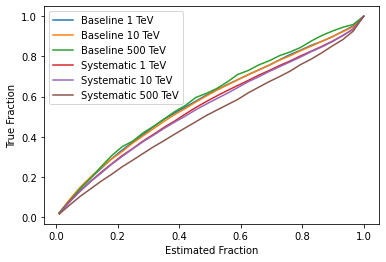

In [6]:

fig, ax = plt.subplots()
ax.set_ylabel(r'True Fraction')
ax.set_xlabel(r'Estimated Fraction')
ax.plot(df_coverage.quantiles, df_coverage.cov_base_1TeV, label='Baseline 1 TeV')
ax.plot(df_coverage.quantiles, df_coverage.cov_base_10TeV, label='Baseline 10 TeV')
ax.plot(df_coverage.quantiles, df_coverage.cov_base_500TeV, label='Baseline 500 TeV')
ax.plot(df_coverage.quantiles, df_coverage.cov_sys_1TeV, label='Systematic 1 TeV')
ax.plot(df_coverage.quantiles, df_coverage.cov_sys_10TeV, label='Systematic 10 TeV')
ax.plot(df_coverage.quantiles, df_coverage.cov_sys_500TeV, label='Systematic 500 TeV')
ax.legend()
